#### pandas / matplotlib 복습
- 서울시 CCTV 현황
- 목표 : 서울시 구별 인구수 대비 CCTV 대수 현황 파악(전체적인 경향 파악)
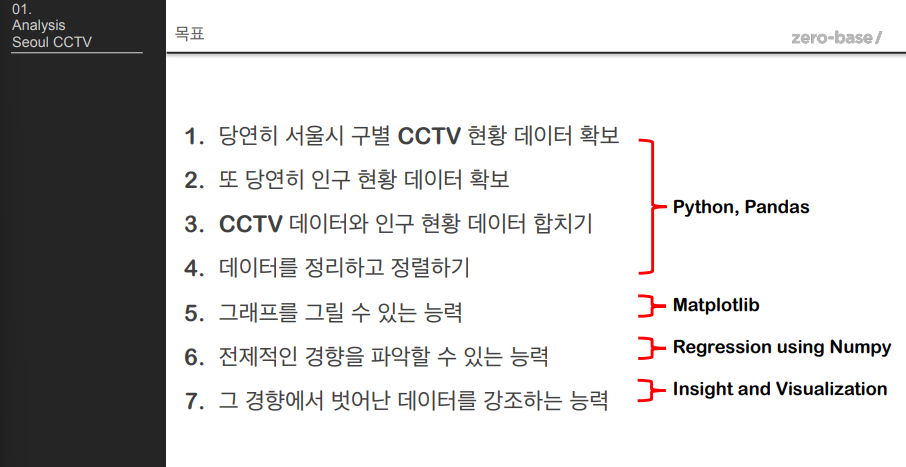

In [1]:
import pandas as pd
import numpy as np

In [2]:
CCTV_seoul=pd.read_csv('../data/01. Seoul_CCTV.csv')
CCTV_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
CCTV_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [8]:
CCTV_seoul.rename(columns={CCTV_seoul.columns[1] : 'CCTV대수'},inplace=True)
CCTV_seoul.head()

,기관명,CCTV대수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [9]:
CCTV_seoul.tail()

,기관명,CCTV대수,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [10]:
CCTV_seoul['최근증가율']=CCTV_seoul['2014년']+CCTV_seoul['2015년']+CCTV_seoul['2016년']/CCTV_seoul['2013년도 이전'] * 100

In [11]:
CCTV_seoul.head()

,기관명,CCTV대수,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,1086.136223
1,강동구,1010,379,99,155,377,353.472296
2,강북구,831,369,120,138,204,313.284553
3,강서구,911,388,258,184,81,462.876289
4,관악구,2109,846,260,390,613,722.458629


In [15]:
CCTV_seoul_sort=CCTV_seoul.sort_values(by='최근증가율',ascending=False)


In [16]:
CCTV_seoul_sort.head()

,기관명,CCTV대수,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,1086.136223
4,관악구,2109,846,260,390,613,722.458629
22,종로구,1619,464,314,211,630,660.775862
8,노원구,1566,542,57,451,516,603.202952
21,은평구,2108,1138,224,278,468,543.124780


In [20]:
CCTV_seoul_sort.set_index('기관명',inplace=True)


In [27]:
pop_seoul = pd.read_excel('../data/01. Seoul_Population.xls',header=2,usecols='B,D,G,J,N')

In [28]:
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [32]:
pop_seoul.drop([0],axis=0,inplace=True)

In [41]:
pop_seoul.rename(columns={
    pop_seoul.columns[1] : '인구수',
    pop_seoul.columns[2] : '한국인',
    pop_seoul.columns[3] : '외국인',
    pop_seoul.columns[4] : '고령자'

},inplace=True)

In [42]:
pop_seoul.head()

,자치구,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [43]:
pop_seoul['한국인비율'] = pop_seoul['한국인'] / pop_seoul['인구수'] * 100
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

In [44]:
pop_seoul.head()

,자치구,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,94.224295,5.775705,15.939656
2,중구,134593,125709,8884,21384,93.399360,6.600640,15.887899
3,용산구,244444,229161,15283,36882,93.747852,6.252148,15.088118
4,성동구,312711,304808,7903,41273,97.472746,2.527254,13.198448
5,광진구,372298,357703,14595,43953,96.079753,3.920247,11.805865


In [46]:
pop_seoul.set_index('자치구',inplace=True)

In [47]:
pop_seoul.head()

,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
자치구,,,,,,,
종로구,164257,154770,9487,26182,94.224295,5.775705,15.939656
중구,134593,125709,8884,21384,93.399360,6.600640,15.887899
용산구,244444,229161,15283,36882,93.747852,6.252148,15.088118
성동구,312711,304808,7903,41273,97.472746,2.527254,13.198448
광진구,372298,357703,14595,43953,96.079753,3.920247,11.805865


In [51]:
len(pop_seoul.index)

25

In [52]:
len(CCTV_seoul_sort.index)

25

In [56]:
CCTV_seoul_sort.rename_axis('구별',inplace=True)

In [57]:
CCTV_seoul_sort

,CCTV대수,2013년도 이전,2014년,2015년,2016년,최근증가율
구별,,,,,,
강남구,3238,1292,430,584,932,1086.136223
관악구,2109,846,260,390,613,722.458629
종로구,1619,464,314,211,630,660.775862
노원구,1566,542,57,451,516,603.202952
은평구,2108,1138,224,278,468,543.124780
서초구,2297,1406,157,336,398,521.307255
동작구,1302,544,341,103,314,501.720588
영등포구,1277,495,214,195,373,484.353535
강서구,911,388,258,184,81,462.876289


In [59]:
pop_seoul.rename_axis('구별',inplace=True)
pop_seoul.head()

,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
구별,,,,,,,
종로구,164257,154770,9487,26182,94.224295,5.775705,15.939656
중구,134593,125709,8884,21384,93.399360,6.600640,15.887899
용산구,244444,229161,15283,36882,93.747852,6.252148,15.088118
성동구,312711,304808,7903,41273,97.472746,2.527254,13.198448
광진구,372298,357703,14595,43953,96.079753,3.920247,11.805865


In [61]:
data_result= pd.merge(CCTV_seoul_sort,pop_seoul,on='구별')
data_result.head()

,CCTV대수,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
구별,,,,,,,,,,,,,
강남구,3238,1292,430,584,932,1086.136223,561052,556164,4888,65060,99.128780,0.871220,11.596073
관악구,2109,846,260,390,613,722.458629,520929,503297,17632,70046,96.615278,3.384722,13.446362
종로구,1619,464,314,211,630,660.775862,164257,154770,9487,26182,94.224295,5.775705,15.939656
노원구,1566,542,57,451,516,603.202952,558075,554403,3672,74243,99.342024,0.657976,13.303409
은평구,2108,1138,224,278,468,543.124780,491202,486794,4408,74559,99.102610,0.897390,15.178888


In [62]:
data_result.drop(['2013년도 이전','2014년','2015년','2016년'],axis=1,inplace=True)

In [63]:
data_result.head()

,CCTV대수,최근증가율,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
구별,,,,,,,,,
강남구,3238,1086.136223,561052,556164,4888,65060,99.128780,0.871220,11.596073
관악구,2109,722.458629,520929,503297,17632,70046,96.615278,3.384722,13.446362
종로구,1619,660.775862,164257,154770,9487,26182,94.224295,5.775705,15.939656
노원구,1566,603.202952,558075,554403,3672,74243,99.342024,0.657976,13.303409
은평구,2108,543.124780,491202,486794,4408,74559,99.102610,0.897390,15.178888


In [66]:
data_result.corr()
# 인구수와 CCTV 개수 사이에 0.2정도의 약한 상관관계가 있음

,CCTV대수,최근증가율,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율
CCTV대수,1.000000,0.594197,0.232555,0.227852,0.030421,0.163905,0.045956,-0.045956,-0.267841
최근증가율,0.594197,1.000000,0.225530,0.223466,-0.010996,0.215203,0.067169,-0.067169,-0.108037
인구수,0.232555,0.225530,1.000000,0.998151,-0.167243,0.936737,0.601076,-0.601076,-0.637414
한국인,0.227852,0.223466,0.998151,1.000000,-0.226853,0.936155,0.645463,-0.645463,-0.628360
외국인,0.030421,-0.010996,-0.167243,-0.226853,1.000000,-0.175318,-0.838612,0.838612,-0.021147
고령자,0.163905,0.215203,0.936737,0.936155,-0.175318,1.000000,0.620300,-0.620300,-0.348840
한국인비율,0.045956,0.067169,0.601076,0.645463,-0.838612,0.620300,1.000000,-1.000000,-0.242816
외국인비율,-0.045956,-0.067169,-0.601076,-0.645463,0.838612,-0.620300,-1.000000,1.000000,0.242816
고령자비율,-0.267841,-0.108037,-0.637414,-0.628360,-0.021147,-0.348840,-0.242816,0.242816,1.000000


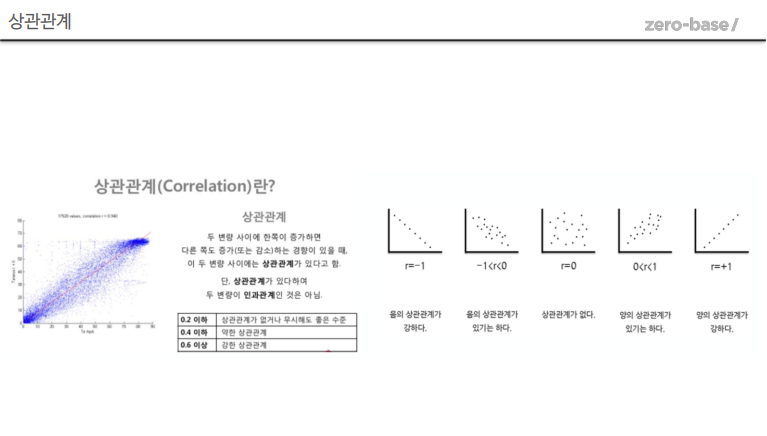
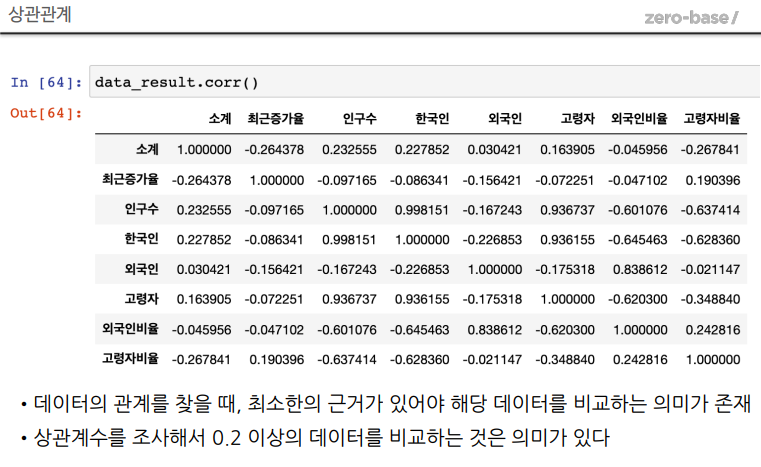

In [68]:
data_result['CCTV비율'] = data_result['CCTV대수'] / data_result['인구수'] * 100

In [69]:
data_result.head()

,CCTV대수,최근증가율,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,,
강남구,3238,1086.136223,561052,556164,4888,65060,99.128780,0.871220,11.596073,0.577130
관악구,2109,722.458629,520929,503297,17632,70046,96.615278,3.384722,13.446362,0.404854
종로구,1619,660.775862,164257,154770,9487,26182,94.224295,5.775705,15.939656,0.985651
노원구,1566,603.202952,558075,554403,3672,74243,99.342024,0.657976,13.303409,0.280607
은평구,2108,543.124780,491202,486794,4408,74559,99.102610,0.897390,15.178888,0.429151


In [71]:
data_result.sort_values(by='CCTV비율',ascending=False,inplace=True)

In [75]:
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams['axes.unicode_minus'] = False

rc('font',family='malgun gothic')
%matplotlib inline

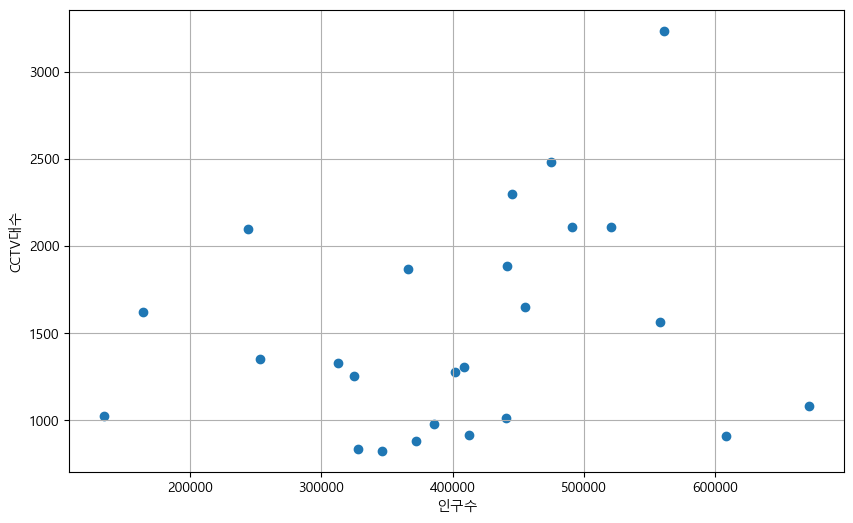

In [77]:
plt.figure(figsize=[10,6])
plt.scatter(data_result['인구수'],data_result['CCTV대수'])
plt.grid(True)
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.show()

##

## numpy를 이용해 선형 회귀선 만들기

In [79]:
fd1 = np.polyfit(data_result['인구수'],data_result['CCTV대수'],1)
fd1

array([1.11155868e-03, 1.06515745e+03])

In [80]:
#회귀 함수 만들기
fd = np.poly1d(fd1)
fd

poly1d([1.11155868e-03, 1.06515745e+03])

In [87]:
x = np.linspace(100000,700000,100)
y = fd(x)

Text(0, 0.5, 'CCTV대수')

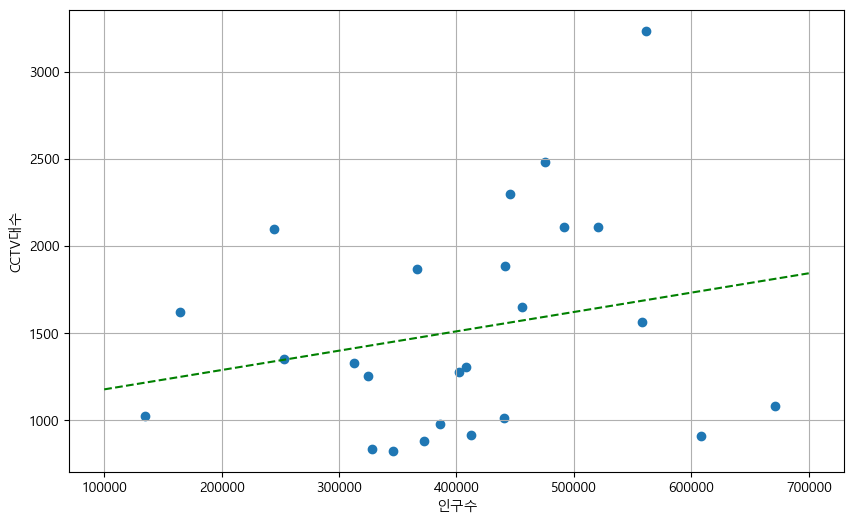

In [91]:
plt.figure(figsize=[10,6])
plt.scatter(data_result['인구수'],data_result['CCTV대수'])
plt.plot(x,y, color='g',ls='--',lw=1.5)
plt.grid(True)
plt.xlabel('인구수')
plt.ylabel('CCTV대수')

#### 경향에서 벗어난(회귀선에서 많이 벗어난) 데이터 강조 하기

In [92]:
data_result['오차'] = data_result['CCTV대수'] - fd(data_result['인구수'])

In [93]:
data_result.head()

,CCTV대수,최근증가율,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,
종로구,1619,660.775862,164257,154770,9487,26182,94.224295,5.775705,15.939656,0.985651,371.261253
용산구,2096,359.093567,244444,229161,15283,36882,93.747852,6.252148,15.088118,0.857456,759.128697
중구,1023,346.261501,134593,125709,8884,21384,93.399360,6.600640,15.887899,0.760069,-191.765470
강남구,3238,1086.136223,561052,556164,4888,65060,99.128780,0.871220,11.596073,0.577130,1549.200326
금천구,1348,372.522255,253491,235154,18337,34170,92.766213,7.233787,13.479769,0.531774,1.072426


In [100]:
# 오차를 오름차순/내림차순 정렬

dr_f = data_result.sort_values(by='오차',ascending=False)
dr_t = data_result.sort_values(by='오차',ascending=True)

In [101]:
dr_f.head()

,CCTV대수,최근증가율,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,
강남구,3238,1086.136223,561052,556164,4888,65060,99.128780,0.871220,11.596073,0.577130,1549.200326
양천구,2482,197.339121,475018,471154,3864,55234,99.186557,0.813443,11.627770,0.522507,888.832166
용산구,2096,359.093567,244444,229161,15283,36882,93.747852,6.252148,15.088118,0.857456,759.128697
서초구,2297,521.307255,445401,441102,4299,53205,99.034802,0.965198,11.945415,0.515715,736.753199
은평구,2108,543.124780,491202,486794,4408,74559,99.102610,0.897390,15.178888,0.429151,496.842700


In [102]:
dr_t.head()

,CCTV대수,최근증가율,인구수,한국인,외국인,고령자,한국인비율,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,
강서구,911,462.876289,608255,601691,6564,76032,98.920847,1.079153,12.500021,0.149773,-830.268578
송파구,1081,176.523629,671173,664496,6677,76582,99.005175,0.994825,11.410173,0.161061,-730.205628
도봉구,825,363.184874,346234,344166,2068,53488,99.402716,0.597284,15.448512,0.238278,-625.016861
중랑구,916,319.414538,412780,408226,4554,59262,98.896749,1.103251,14.356800,0.221910,-607.986645
광진구,878,161.366492,372298,357703,14595,43953,96.079753,3.920247,11.805865,0.235833,-600.988527


In [104]:
from matplotlib.colors import ListedColormap

color_step=['#e74c3c','#2ecc71','#95a9a6','#2ecc71','#3498db','#3498db']
my_cmap=ListedColormap(color_step)

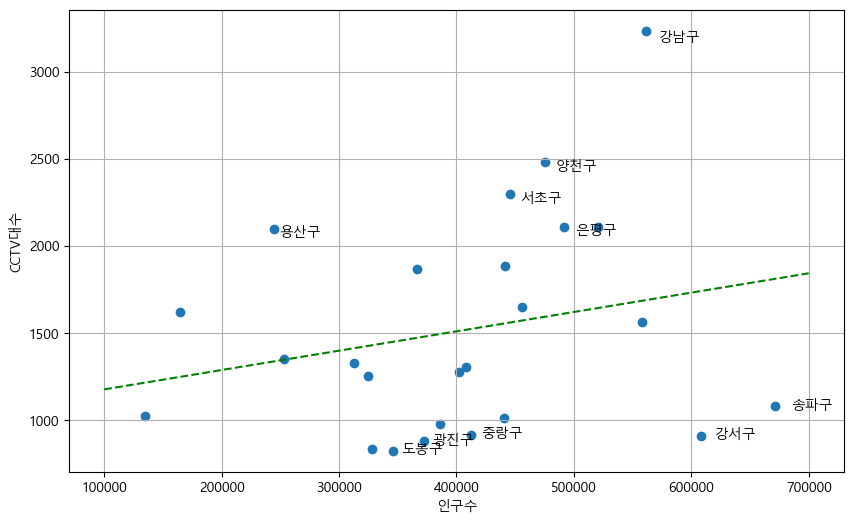

In [108]:
#상위,하위 데이터에 색깔입히기
#상위,하위 데이터에 구별 이름 넣기

plt.figure(figsize=[10,6])
plt.scatter(data_result['인구수'],data_result['CCTV대수'])
plt.plot(x,y, color='g',ls='--',lw=1.5)

for i in range(5):
    #상위 5개
    plt.text(dr_f['인구수'][i] * 1.02,dr_f['CCTV대수'][i]*0.98,dr_f.index[i])

    #하위 5개
    plt.text(dr_t['인구수'][i]* 1.02,dr_t['CCTV대수'][i]*0.98,dr_t.index[i])



plt.grid(True)
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.show()

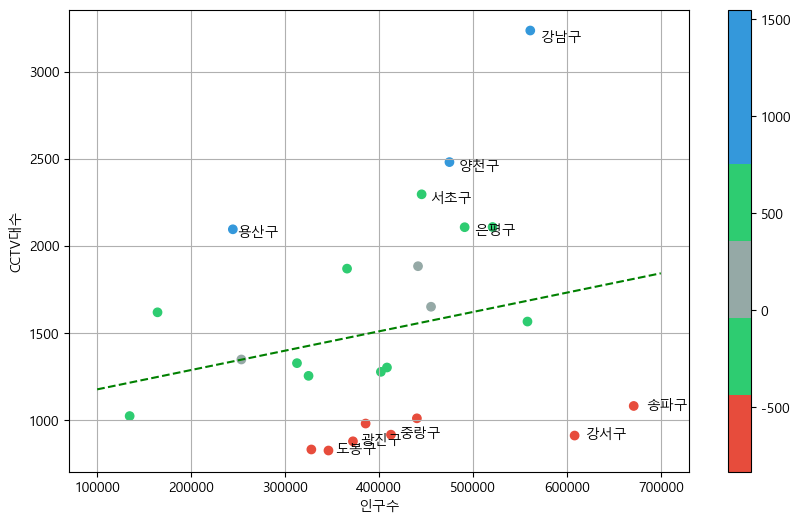

In [109]:
plt.figure(figsize=[10,6])
#색깔 입히기
plt.scatter(data_result['인구수'],data_result['CCTV대수'],c=data_result['오차'] , cmap=my_cmap)
plt.plot(x,y, color='g',ls='--',lw=1.5)

for i in range(5):
    #상위 5개
    plt.text(dr_f['인구수'][i] * 1.02,dr_f['CCTV대수'][i]*0.98,dr_f.index[i])

    #하위 5개
    plt.text(dr_t['인구수'][i]* 1.02,dr_t['CCTV대수'][i]*0.98,dr_t.index[i])

#색깔 입히기
plt.colorbar()

plt.grid(True)
plt.xlabel('인구수')
plt.ylabel('CCTV대수')
plt.show()